In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv("C:\\Users\\User\\Downloads\\haberman.csv",header=None,names=['Age',"Operation_year",'axial_node','survival_status'])

In [3]:
data.head()

,Age,Operation_year,axial_node,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
data.tail()

,Age,Operation_year,axial_node,survival_status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


1 means survived

In [5]:
data.shape

(306, 4)

In [6]:
data.columns.values

array(['Age', 'Operation_year', 'axial_node', 'survival_status'],
      dtype=object)

In [7]:
data.describe()

,Age,Operation_year,axial_node,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


We can see axial node has high outliers as max value is greater than 75%

In [12]:
data.survival_status.unique()

array([1, 2], dtype=int64)

In [13]:
data.survival_status.value_counts()

1    225
2     81
Name: survival_status, dtype: int64

here we can observe that category 1 has large number of values

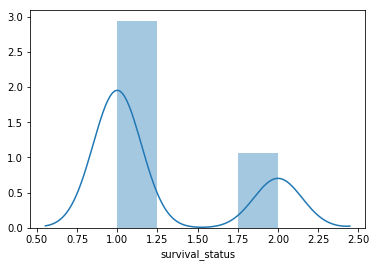

In [8]:
sns.distplot(data.survival_status)

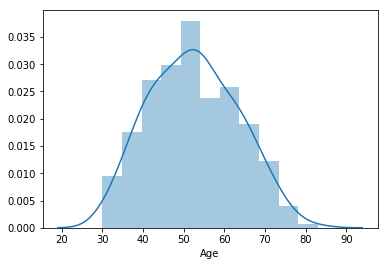

In [9]:
sns.distplot(data.Age)

THE PERFECT CURVE THE DISTRIBUTION IS ACTUALLY EVEN

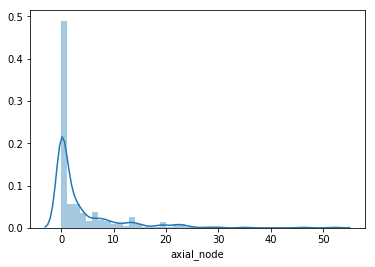

In [10]:
sns.distplot(data.axial_node)

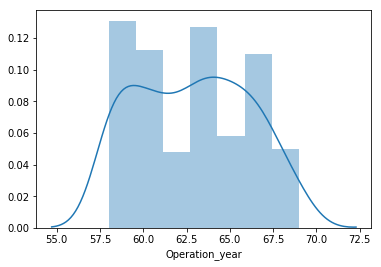

In [11]:
sns.distplot(data.Operation_year)

most data is in between and a bit reduction in between 60.0 to 62.5

In [13]:
print("the skew value for axial node is",data['axial_node'].skew())

the skew value for axial node is 2.9838229044308258


In [14]:
print("the kurtosis value for axial node is",data['axial_node'].kurtosis())

the kurtosis value for axial node is 11.730876914649611


In [15]:
print("the skew value for age is",data['Age'].skew())

the skew value for age is 0.14650505649010387


In [16]:
print("the kurtosis value for age is",data['Age'].kurtosis())

the kurtosis value for age is -0.589393038395932


# Probability distribution function

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]
        pdf       cdf
0  0.052288  0.052288
1  0.088235  0.140523
2  0.150327  0.290850
3  0.173203  0.464052
4  0.179739  0.643791
5  0.133987  0.777778
6  0.133987  0.911765
7  0.058824  0.970588
8  0.022876  0.993464
9  0.006536  1.000000


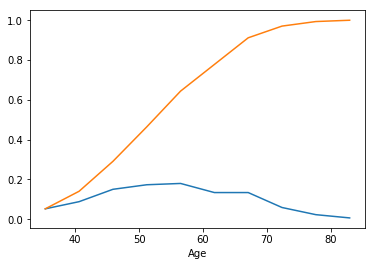

In [22]:
counts,bin_edges=np.histogram(data['Age'],bins=10,density=True)
plt.xlabel('Age')
pdf=counts/sum(counts)
print(pdf)
cdf=np.cumsum(pdf)
print(cdf)
print(pd.DataFrame({'pdf':pdf,'cdf':cdf}))
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

Blue line is a pdf and yellow is cdf

# Kernel desity estimation 

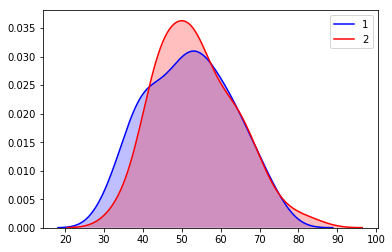

In [37]:
#sns.kdeplot(data.loc[(data['survival_status']==1)],color='b',shade=True,label='1')

sns.kdeplot(data.loc[(data['survival_status']==1),'Age'],color='b',shade=True,label='1')
sns.kdeplot(data.loc[(data['survival_status']==2),'Age'],color='r',shade=True,label='2')

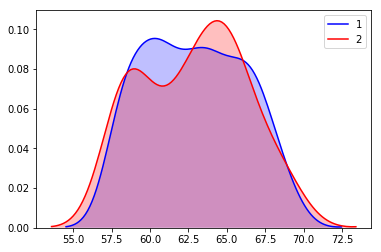

In [38]:
sns.kdeplot(data.loc[(data['survival_status']==1),'Operation_year'],color='b',shade=True,label='1')
sns.kdeplot(data.loc[(data['survival_status']==2),'Operation_year'],color='r',shade=True,label='2')

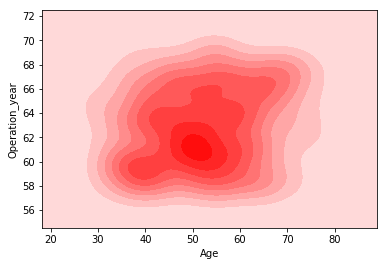

In [45]:
surv1=data.query('survival_status==1')
surv2=data.query('survival_status==2')
sns.kdeplot(surv1['Age'],surv1['Operation_year'],color='r',label=1,shade=True)
#sns.kdeplot(surv2['Age'],surv2['Operation_year'],color='b',label=2,shade=True)


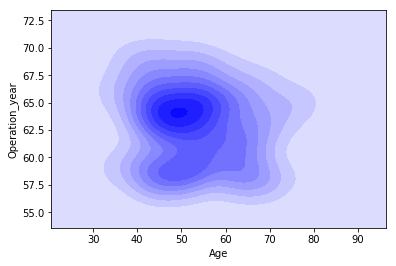

In [46]:
sns.kdeplot(surv2['Age'],surv2['Operation_year'],color='b',label=2,shade=True)

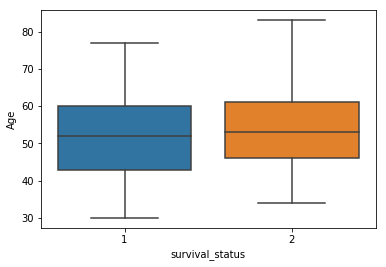

In [47]:
sns.boxplot(x='survival_status',y='Age',data=data)
plt.show()

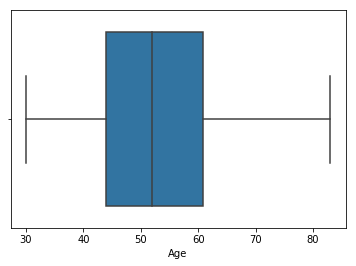

In [48]:
sns.boxplot(data['Age'])

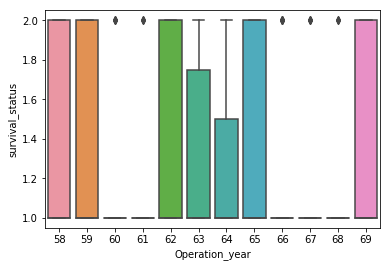

In [50]:
sns.boxplot(data['Operation_year'],data['survival_status'])

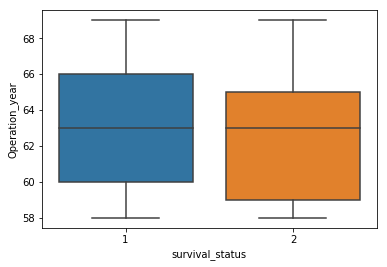

In [51]:
sns.boxplot(x='survival_status',y='Operation_year',data=data)

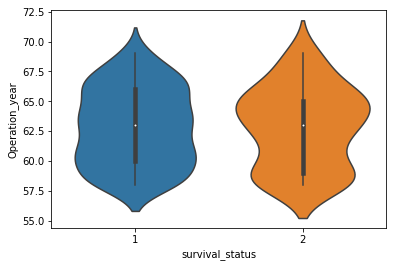

In [53]:
sns.violinplot(x='survival_status',y='Operation_year',data=data)

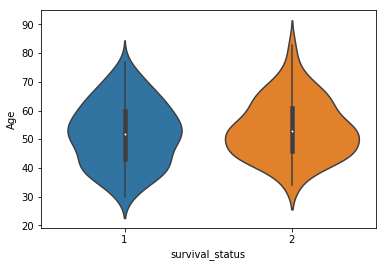

In [54]:
sns.violinplot(x='survival_status',y='Age',data=data)

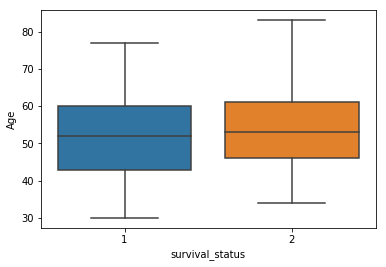

In [55]:
sns.boxplot(x='survival_status',y='Age',data=data)

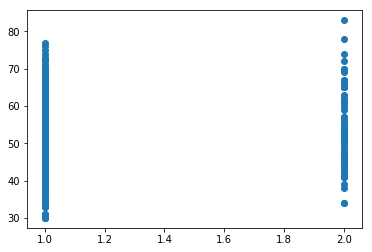

In [58]:
plt.scatter(x='survival_status',y='Age',data=data)

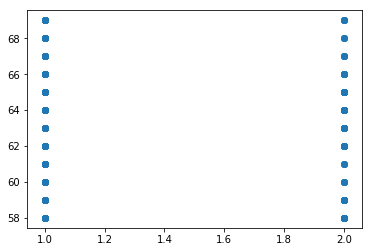

In [59]:
plt.scatter(x='survival_status',y='Operation_year',data=data)

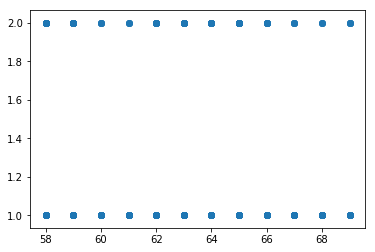

In [60]:
plt.scatter(x='Operation_year',y='survival_status',data=data)

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


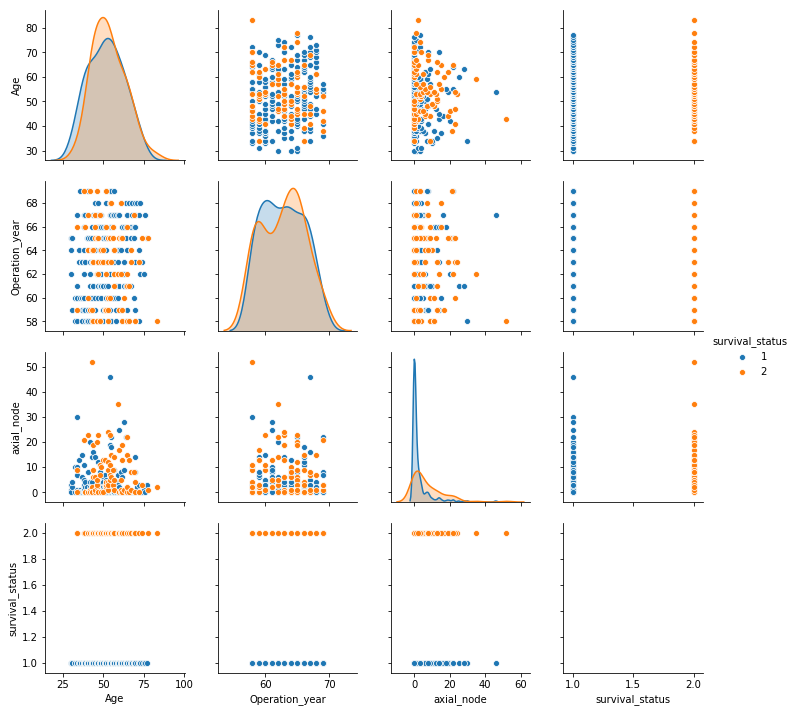

In [61]:
sns.pairplot(data,hue='survival_status')


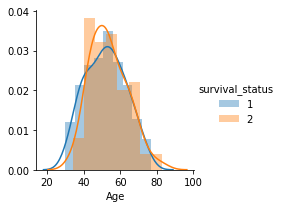

In [62]:
sns.FacetGrid(data,hue='survival_status').map(sns.distplot,'Age').add_legend()